In [1]:
import pandas as pd
import gmaps
from config import gkey
import numpy as np

accident_data = pd.read_csv("data/accidents.csv")

In [2]:
# Data cleanup

# Filters out dates containing 2016, 2017, & 2019 -- too much data in dataset to handle with laptops
df = accident_data[~accident_data["Start_Time"].str.contains("2016")]
df = df[~df["Start_Time"].str.contains("2017")]
df = df[~df["Start_Time"].str.contains("2019")]

# Splits the Start_Time column into individual columns
df[["Date", "Time"]] = df["Start_Time"].str.split(expand=True)

# Renames columns to be more readable
df = df.rename(columns={"Start_Lat":"Lat", "Start_Lng":"Lng", "Weather_Condition":"Weather"})

# Filters and rearranges dataset to display most useful columns
df = df[["Date", "Time", "Lat", "Lng", "City", "State",
         "County", "Weather", "Temperature(F)", "Severity", "Nautical_Twilight"]]

df = df.reset_index()

df.head(20)

,index,Date,Time,Lat,Lng,City,State,County,Weather,Temperature(F),Severity,Nautical_Twilight
0,626043,2018-12-31,23:54:51,40.740047,-73.818512,Flushing,NY,Queens,Heavy Rain,46.9,3,Night
1,626045,2018-12-31,22:40:11,40.834370,-73.864113,Bronx,NY,Bronx,Rain,46.4,3,Night
2,626355,2018-12-31,12:35:54,38.441975,-88.953049,Dix,IL,Jefferson,Light Rain,57.0,3,Day
3,626407,2018-12-31,22:32:27,30.241417,-97.726158,Austin,TX,Travis,Partly Cloudy,39.9,2,Night
4,626462,2018-12-31,23:49:55,32.773060,-96.744247,Dallas,TX,Dallas,Clear,43.0,2,Night
5,626463,2018-12-31,23:49:24,32.818420,-96.802391,Dallas,TX,Dallas,Clear,43.0,2,Night
6,626563,2018-12-31,18:46:51,39.902153,-104.988914,Denver,CO,Adams,Snow,8.6,3,Night
7,626574,2018-12-31,22:26:47,32.192139,-110.857933,Tucson,AZ,Pima,Light Rain,37.4,2,Night
8,626599,2018-12-31,22:40:29,35.008537,-105.664352,Moriarty,NM,Torrance,Light Snow,27.9,3,Night
9,626602,2018-12-31,22:37:23,35.423836,-108.312744,Continental Divide,NM,McKinley,Light Snow,25.0,3,Night


In [3]:
#Creating a day of the week column with current time stamps
import datetime
weekday = []
for d in range(0, len(df["Date"])):
    dt = pd.Timestamp(df["Date"][d])
    day_ofwk = dt.weekday_name
    weekday.append(day_ofwk)
new_df = pd.DataFrame({"Day of Week": weekday})
df.insert(1,"Day of Week",new_df["Day of Week"],True)
df.head()

/Users/mattfahys/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


,index,Day of Week,Date,Time,Lat,Lng,City,State,County,Weather,Temperature(F),Severity,Nautical_Twilight
0,626043,Monday,2018-12-31,23:54:51,40.740047,-73.818512,Flushing,NY,Queens,Heavy Rain,46.9,3,Night
1,626045,Monday,2018-12-31,22:40:11,40.834370,-73.864113,Bronx,NY,Bronx,Rain,46.4,3,Night
2,626355,Monday,2018-12-31,12:35:54,38.441975,-88.953049,Dix,IL,Jefferson,Light Rain,57.0,3,Day
3,626407,Monday,2018-12-31,22:32:27,30.241417,-97.726158,Austin,TX,Travis,Partly Cloudy,39.9,2,Night
4,626462,Monday,2018-12-31,23:49:55,32.773060,-96.744247,Dallas,TX,Dallas,Clear,43.0,2,Night


In [5]:
#Arranging data by day of the week on count of accidents
ch_frame = df.groupby(["Day of Week"]).count()["index"]
ch_frame = pd.DataFrame(ch_frame)
ch_frame = ch_frame.reset_index()
ch_frame

,Day of Week,index
0,Friday,163201
1,Monday,157849
2,Saturday,48873
3,Sunday,42288
4,Thursday,154159
5,Tuesday,164864
6,Wednesday,161391


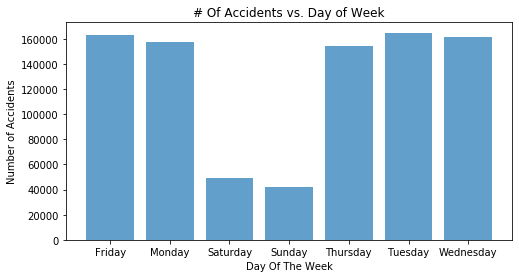

In [8]:
#Plotting # of accidents vs. Day of the week. (Accidents during the weekend have a huge drop)
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.xlabel("Day Of The Week")
plt.ylabel("Number of Accidents")
plt.title("# Of Accidents vs. Day of Week")
plt.bar(ch_frame["Day of Week"], ch_frame["index"], alpha=.7)
plt.savefig('output/# Of Accidents Day of Week')

In [6]:
#Arranging data by severity on day & night accident count. 
sev_ch_frame = df.groupby(["Nautical_Twilight", "Severity"]).count()["index"]
sev_ch_frame = sev_ch_frame.reset_index()
sev_ch_frame = pd.DataFrame(sev_ch_frame)
sev_ch_frame = sev_ch_frame.pivot(index='Severity', columns='Nautical_Twilight', values='index')
sev_ch_frame = sev_ch_frame.replace(np.nan, 0)
sev_ch_frame

Nautical_Twilight,Day,Night
Severity,,
0,9.0,0.0
1,233.0,26.0
2,498214.0,75812.0
3,242426.0,50127.0
4,17871.0,7896.0


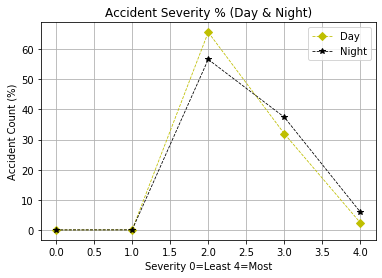

In [7]:
#Plotting total day & night accidents a percentage of its total based on severity. (If you get into an accident at night it is more likeley to be severe) 
plt.plot(100 * sev_ch_frame["Day"] / sum(sev_ch_frame["Day"]), marker="D", color="y", alpha=1, linestyle="dashed", linewidth=0.8, label="Day")
plt.plot(100 * sev_ch_frame["Night"] / sum(sev_ch_frame["Night"]), marker="*", color="black", alpha=1, linestyle="dashed", linewidth=0.8, label="Night")
plt.legend(loc="best")
plt.title("Accident Severity % (Day & Night)")
plt.ylabel("Accident Count (%)")
plt.xlabel("Severity 0=Least 4=Most")
plt.grid(True)
plt.savefig('output/Night Day %')

In [8]:
print(f"Total accidents at night = " + str(sum(sev_ch_frame["Night"])) + "\nTotal accidents during the day = " + str(sum(sev_ch_frame["Day"])))

Total accidents at night = 133861.0
Total accidents during the day = 758753.0
